In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from fullfrlm import flow_refueling_location_model
import networkx as nx
from flow_computation import flow_computation

In [2]:
## Load necessary data
G = pickle.load(open('data/network_cleaned_final.p', 'rb'))
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))
paths = pickle.load(open('data/final_paths.p', "rb"))

In [3]:
pos_dict = {}

for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'], G.nodes[node]['Y'])

harbour_nodes = df_h.harbour_node.unique()

#extract data
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

## Plot network flow within data set

We want to use the flow value for each path to compute the flow value for each link using paths now

In [4]:
flows = flow_computation(df_ivs, 100000, path_lengths)

In [5]:
sum(flows.values())

2941841.1904762224

In [6]:
df_links = nx.to_pandas_edgelist(G)

In [7]:
def plot_context(G, flows, attribute_name, scale_factor):

    df_links[attribute_name] = 0
    for key, flow in flows.items():
        route = paths[key]
        passed_links = [route[i:(i + 2)] for i in range(len(route) - 1)]
        for link in passed_links:
            df_links.loc[(df_links.source.isin(link)) & (df_links.target.isin(link)), attribute_name] += flow
    flow_values_edges = dict(zip(tuple(zip(df_links.source, df_links.target)), df_links[attribute_name]))
    nx.set_edge_attributes(G, flow_values_edges, attribute_name)

    fig, ax = plt.subplots(dpi=200)


    widths = nx.get_edge_attributes(G, attribute_name)
    scale_factor = scale_factor
    scaled_widths = {i:(widths[i]/scale_factor) for i in widths.keys()}

    nx.draw_networkx_nodes(G,pos_dict,
                           nodelist=harbour_nodes,
                           node_size=30,
                           node_color='r',
                           alpha=1)

    nx.draw_networkx_edges(G,pos_dict,
                           edgelist = scaled_widths.keys(),
                           width=list(scaled_widths.values()),
                           # edge_color='blue',
                           alpha=1)

    # nx.draw_networkx_labels(G, pos=pos_dict,
    #                         labels=dict(zip(nodelist,nodelist)),
    #                         font_color='white')
    plt.box(False)
    img = plt.imread("data/NL_map.png")
    x1, x2, y1, y2 = 3.566619, 6.944693, 50.860830, 53.444274
    z = 0.53
    ax.imshow(img, extent=[x1-z, x2+z, y1-z+0.3, y2+z-0.3])
    plt.show()
    return widths

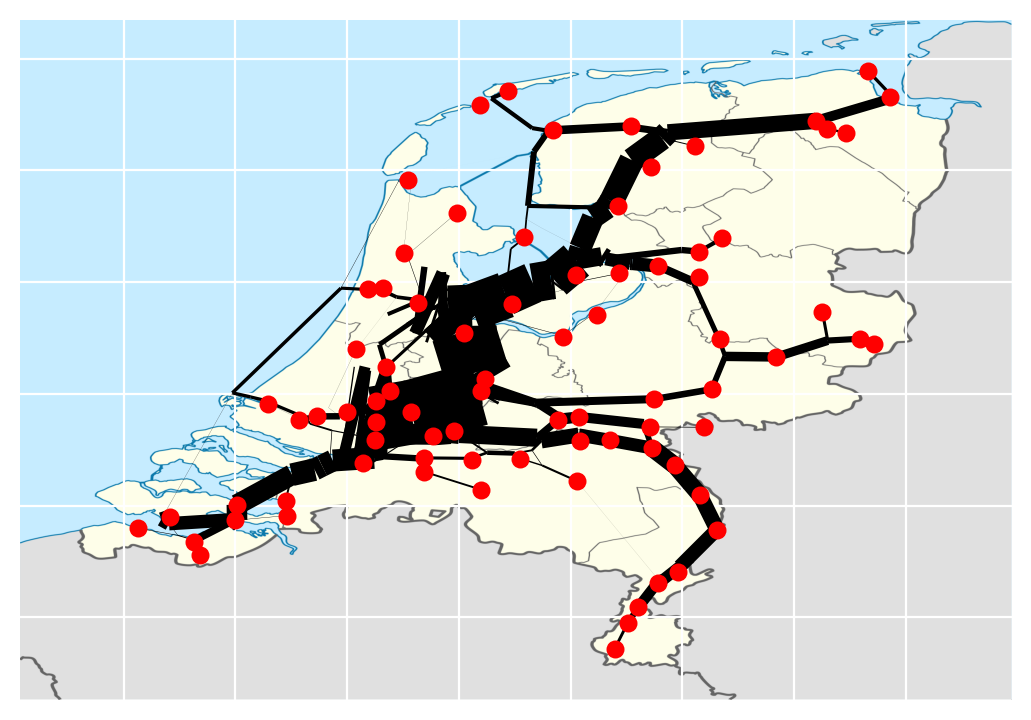

In [8]:
widths0 = plot_context(G, flows, 'passing_flow', 50000)

In [9]:
df_links = nx.to_pandas_edgelist(G)

In [10]:
flows = flow_computation(df_ivs, 100000, path_lengths, False)

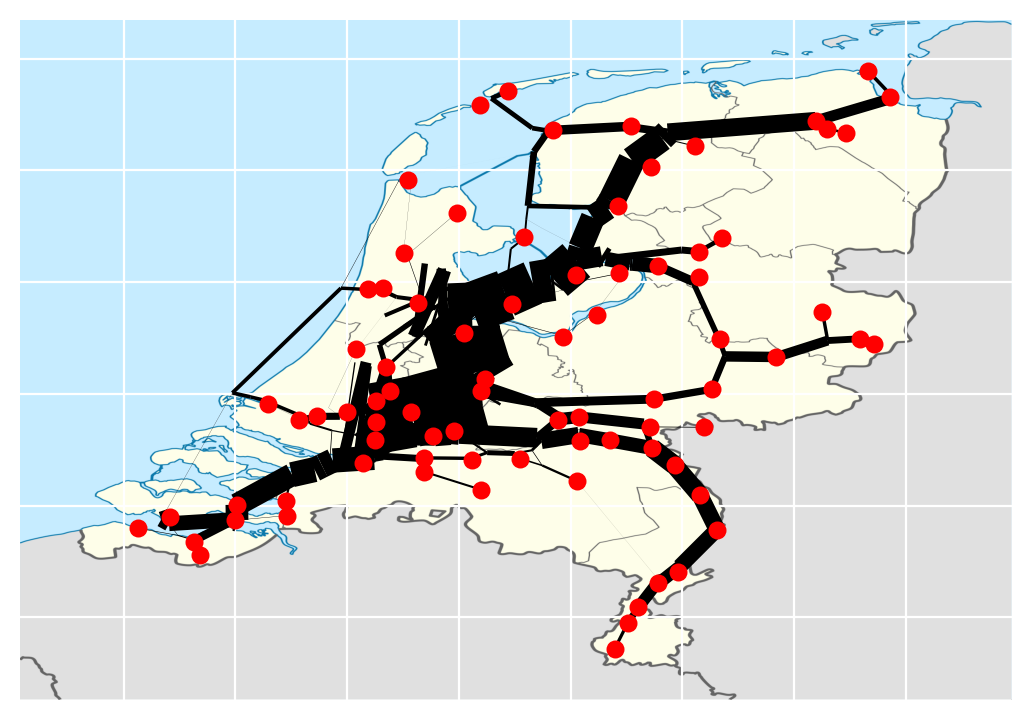

In [11]:
widths1 = plot_context(G, flows, 'passing_flow', 50000)

In [12]:
round((sum(widths1.values())-sum(widths0.values()))/sum(widths0.values())*100, 2)

9.79

In [13]:
sum(widths0.values())

56775884.83643783

In [14]:
sum(widths1.values())

62331647.1878443

In [15]:
## Why does using non-individual speeds lead to different results?

In [16]:
ship_data = pd.read_excel('data/ship_types.xlsx')

## Plot captured flow

## 60000

In [17]:
# r, p, c, x_m,  additional_nodes=0, vis=False, o=24, random_data=False, load=1, seed=None

Optimal


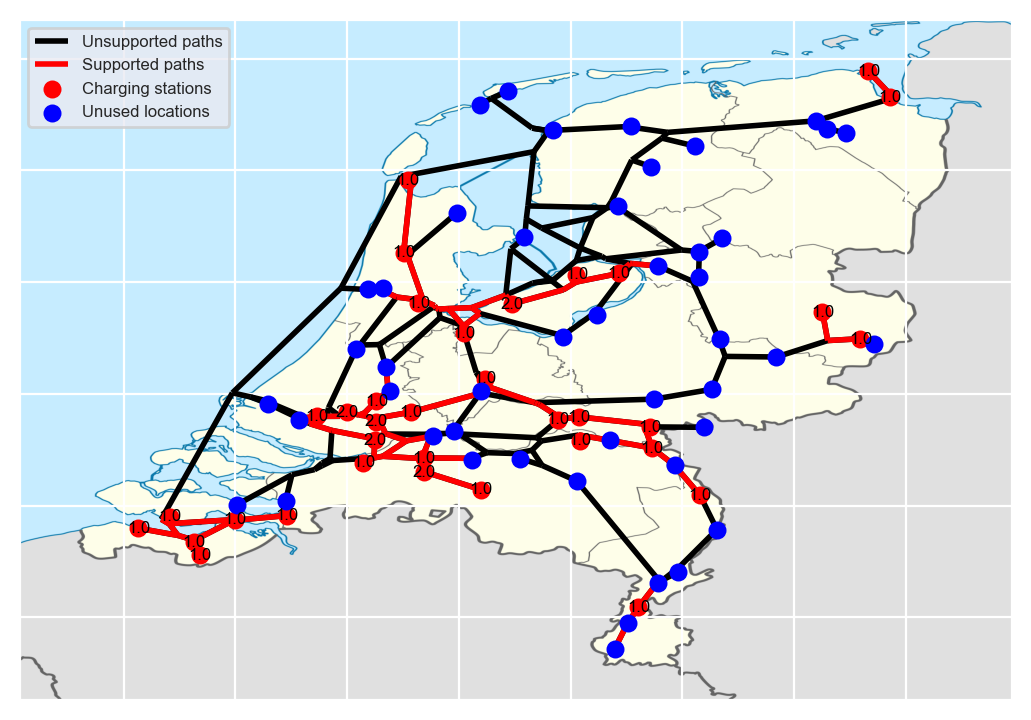

In [18]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(60000, 40, 1000, 2, vis=True)

In [19]:
print("Fraction captured total:", round(fraction_captured_total,2))
print("Fraction serviceable:", round(serviceable_fraction,2))
print("Serviced fraction:", round(served_fraction,2))
print("Charging:", round(max_flow / (100 * 1000),2))

Fraction captured total: 0.08
Fraction serviceable: 0.09
Serviced fraction: 0.83
Charging: 2.23


In [20]:
sum(optimal_facilities.values())

40.0

In [21]:
captured_flows = {i:sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}

In [22]:
captured_flows = {i:j*flows[i] for i,j in captured_flows.items()}

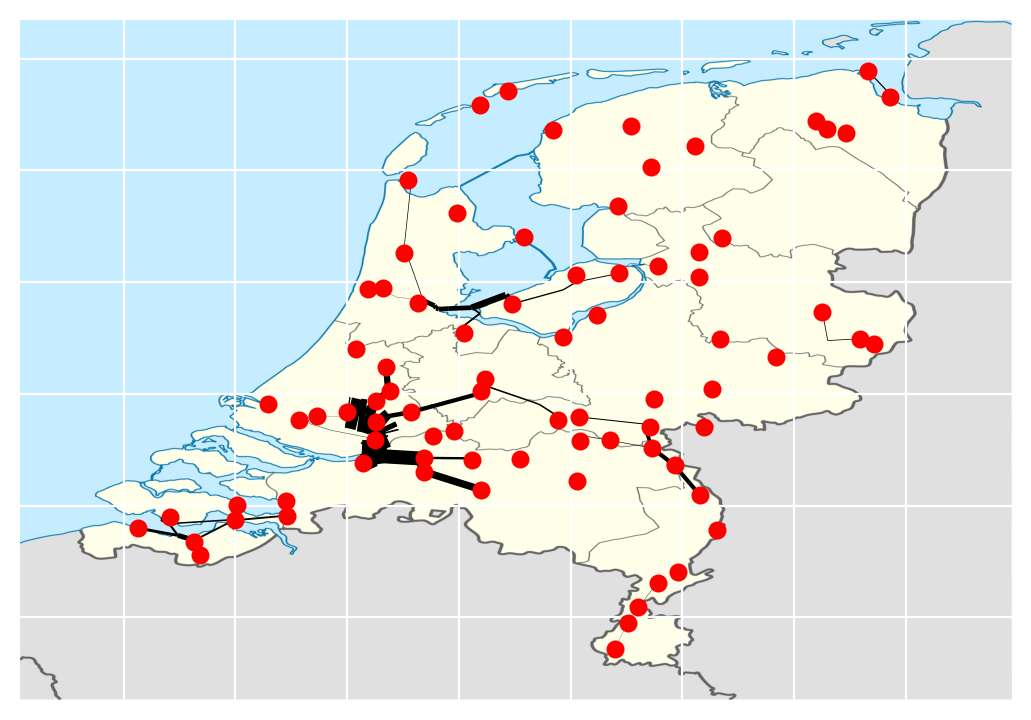

In [23]:
widths3 = plot_context(G, captured_flows, 'captured_flow_60000', 10000)

In [24]:
widths3

{('8864153', '8860579'): 2661.5084469626313,
 ('8864153', '8868168'): 0.0,
 ('8868065', '8862419'): 0.0,
 ('8868065', '8866297'): 4277.3282170138955,
 ('8868065', '8863614'): 4277.3282170138955,
 ('8865920', '8864117'): 0.0,
 ('8864526', '8864005'): 4776.393402297339,
 ('8864526', '8862690'): 4776.393402297339,
 ('8864526', '8868457'): 0.0,
 ('8868208', '8861292'): 1288.033433744094,
 ('8868208', '8867148'): 1279.5912026453852,
 ('8860933', '8864167'): 0.0,
 ('8860933', '8863336'): 0.0,
 ('8860933', '8867031'): 0.0,
 ('8863354', '22638327'): 16983.621327869187,
 ('8863354', '8861687'): 16983.621327869187,
 ('8863354', '8862687'): 0.0,
 ('8863114', '22638019'): 14933.308272713055,
 ('8863114', '8864553'): 14933.308272713055,
 ('8863114', '8860623'): 0.0,
 ('8861840', '8863288'): 0.0,
 ('8861840', '8865143'): 0.0,
 ('8861840', '8863762'): 0.0,
 ('11309058', '11309119'): 0.0,
 ('11309058', '8865990'): 0.0,
 ('11309058', '8866775'): 0.0,
 ('8867046', '8862592'): 0.0,
 ('8867046', '8863360'

## 90000

Optimal


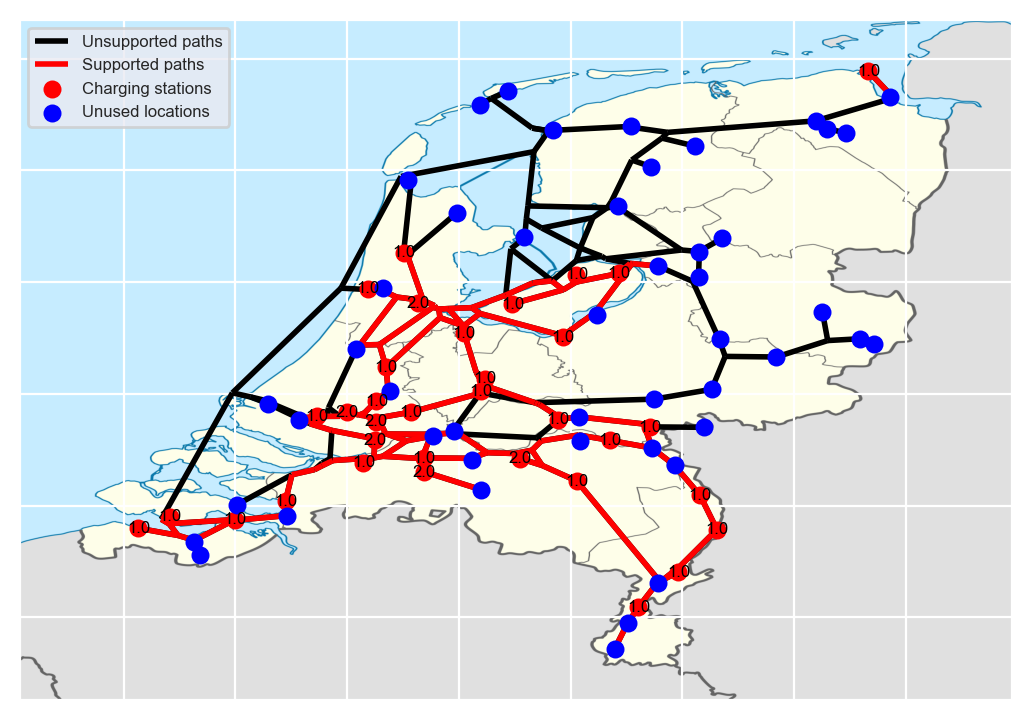

In [25]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(90000, 40, 1000, 2, vis=True)

In [26]:
print("Fraction captured total:", round(fraction_captured_total,2))
print("Fraction serviceable:", round(serviceable_fraction,2))
print("Serviced fraction:", round(served_fraction,2))
print("Charging:", round(max_flow / (100 * 1000),2))

Fraction captured total: 0.13
Fraction serviceable: 0.24
Serviced fraction: 0.53
Charging: 3.75


In [27]:
sum(optimal_facilities.values())

40.0

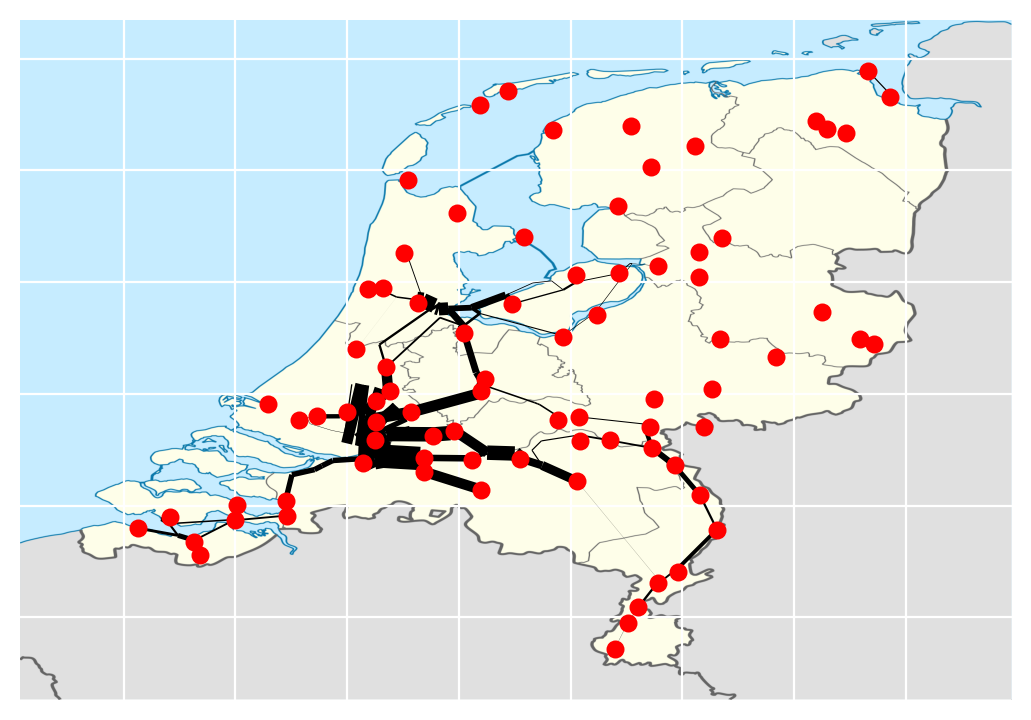

In [28]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths4 = plot_context(G, captured_flows, 'captured_flow_90000', 10000)

## 120000

Optimal


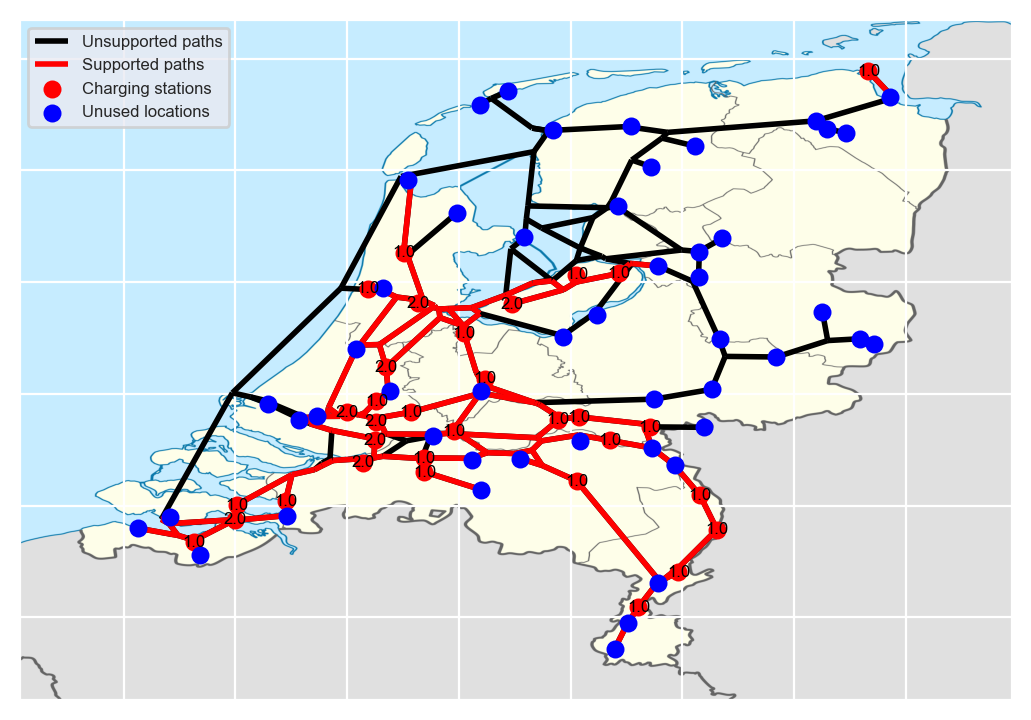

In [29]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(120000, 40, 1000, 2, vis=True)

In [30]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Charging:", round(max_flow / (100 * 1000), 2))

Fraction captured total: 0.18
Fraction serviceable: 0.53
Fraction serviced: 0.34
Charging: 5.22


In [31]:
sum(optimal_facilities.values())

40.0

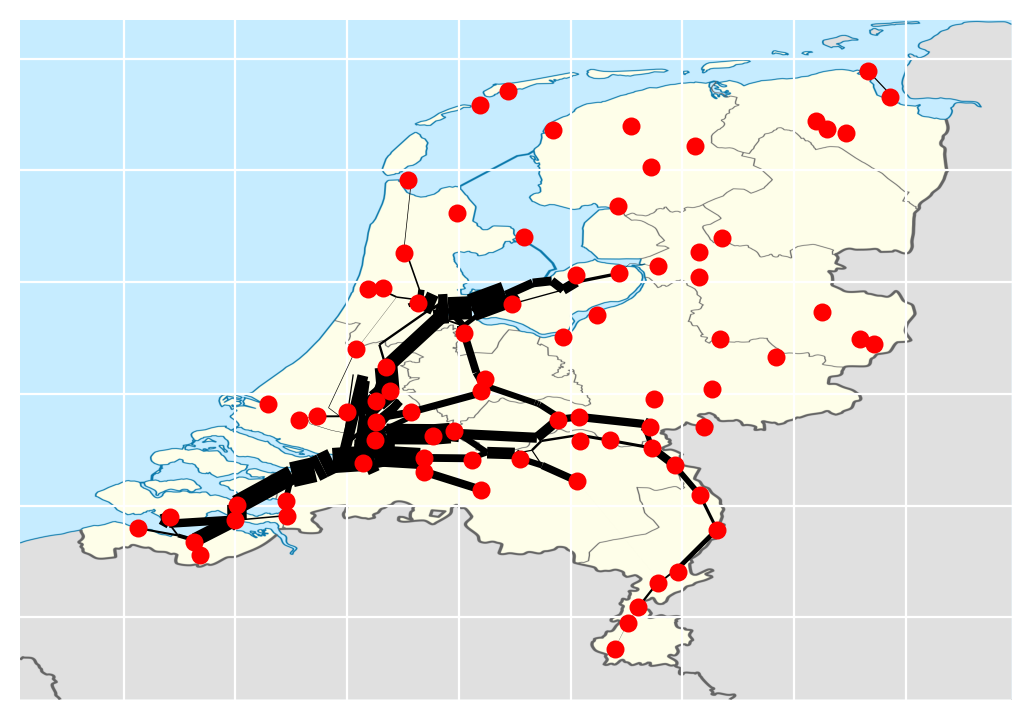

In [32]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths5 = plot_context(G, captured_flows, 'captured_flow_120000', 10000)

## 150000

Optimal


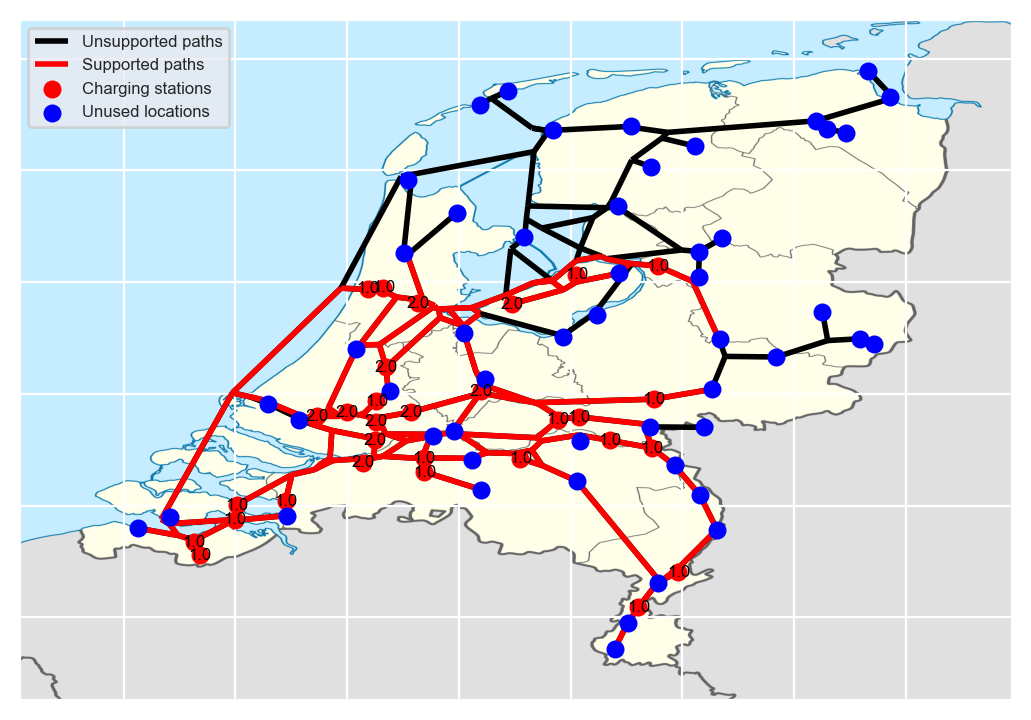

In [33]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(150000, 40, 1000, 2, vis=True)

In [34]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Charging:", round(max_flow / (100 * 1000), 2))

Fraction captured total: 0.24
Fraction serviceable: 0.75
Fraction serviced: 0.32
Charging: 6.92


In [35]:
sum(optimal_facilities.values())

40.0

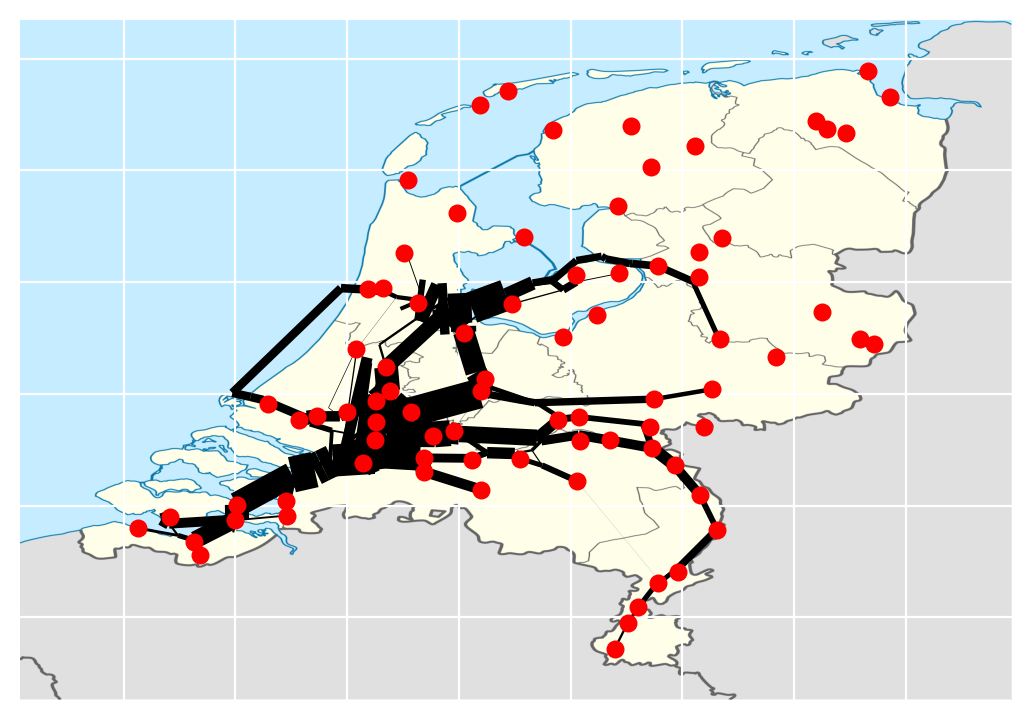

In [36]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths6 = plot_context(G, captured_flows, 'captured_flow_150000', 10000)

## Extreme values

### Max range 1,000,000

Optimal


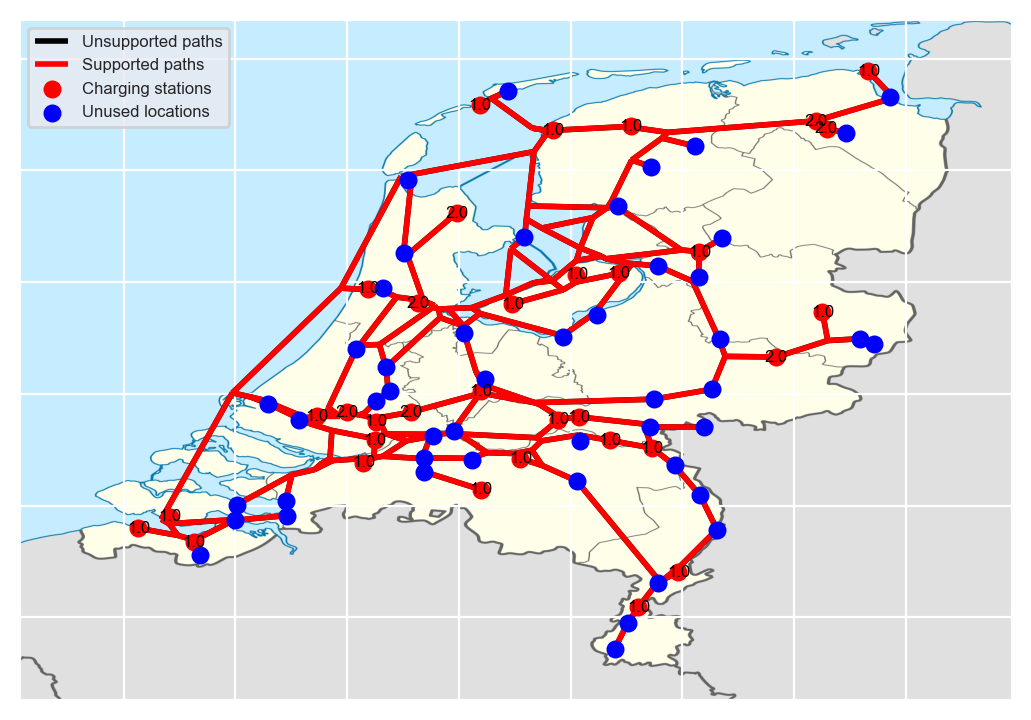

In [37]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(1000000, 40, 1000, 2, vis=True)

In [38]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Charging:", round(max_flow / (100 * 1000), 2))

Fraction captured total: 1.0
Fraction serviceable: 1.0
Fraction serviced: 1.0
Charging: 29.42


In [39]:
sum(optimal_facilities.values())

40.0

In [40]:
routes_supported

282.0

In [41]:
for route, combi_flow in non_zero_flows.items():
    print(sum(combi_flow['flows']))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999970000001
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.000000002
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1

In [42]:
max_flow

2941841.1909088613

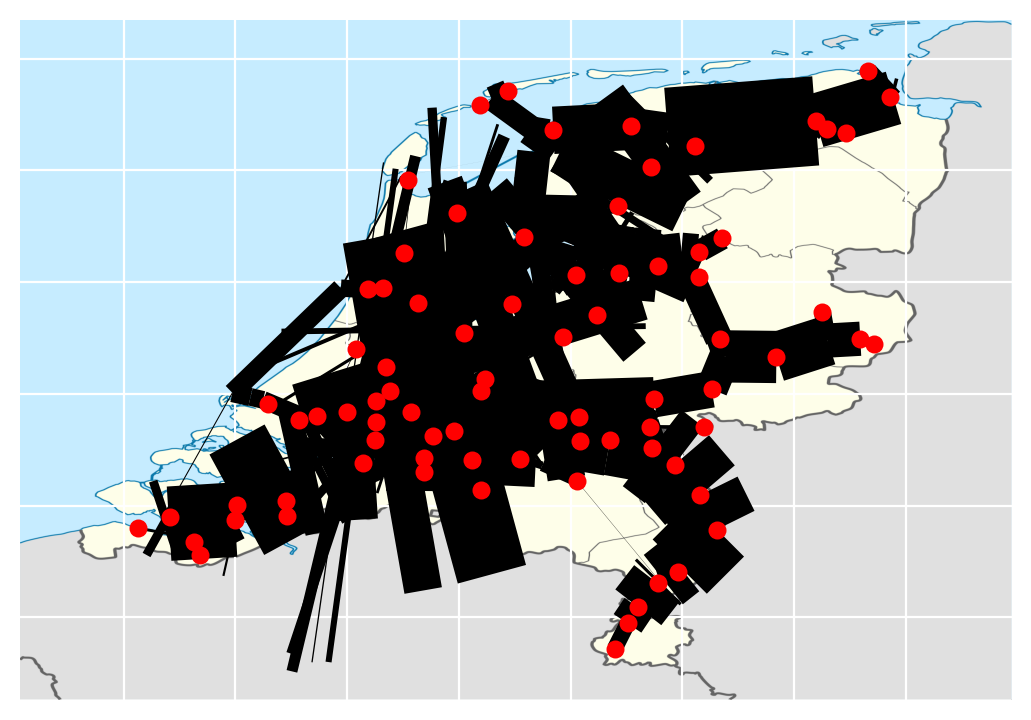

In [43]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths7 = plot_context(G, captured_flows, 'captured_flow_1mln', 10000)

In [44]:
flow_cols = [col for col in df_links.columns if 'flow' in col]

In [45]:
flow_cols

['passing_flow',
 'captured_flow_60000',
 'captured_flow_90000',
 'captured_flow_120000',
 'captured_flow_150000',
 'captured_flow_1mln']

In [46]:
df_links[flow_cols].sum()

passing_flow            6.233165e+07
captured_flow_60000     2.153364e+06
captured_flow_90000     4.414600e+06
captured_flow_120000    6.646055e+06
captured_flow_150000    9.957791e+06
captured_flow_1mln      6.233165e+07
dtype: float64

In [47]:
## Capacity limits do not work? or at least not correctly...